In [1]:
import pandas as pd
import numpy as np
import random
import time
import operator

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# data preparation for training models, model selection and splitting the data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

In [4]:
# data models to implement
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# data evaluation
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [6]:
orig_df = pd.read_csv(r'heart.csv')
df = pd.read_csv(r'heart.csv')

In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
all_cats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
cats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [14]:
nums = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
for cat in all_cats:
    print(df[cat].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exang, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64
1    165
0    138
Name: target, dtype: int64


In [16]:
df['ca'].replace(4, df['ca'].median(), inplace=True)
df['thal'].replace(0, df['thal'].median(), inplace=True)

In [17]:
df['thal'].replace(3, 7, inplace=True)
df['thal'].replace(2, 3, inplace=True)
df['thal'].replace(1, 6, inplace=True)

In [18]:
def pie_charts(df, targets):
    fig, axes = plt.subplots(ncols = 1, nrows = len(targets), figsize = (20,40))
    for i, target in enumerate(targets):
        arr = np.zeros(len(df[target].value_counts().index))
        arr[:-1] = 0.1
        arr[-1] = 0.3
        axes[i].pie(df[target].value_counts(), 
                    labels = df[target].value_counts().index,
                   autopct = '%1.2f%%',
                   explode = arr)
        axes[i].set_title(target)
    plt.show()

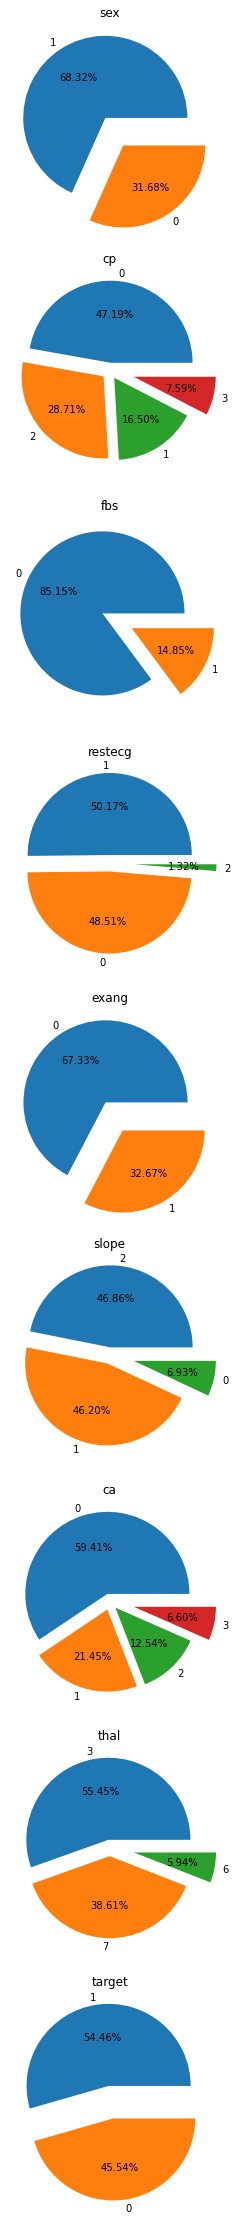

In [19]:
pie_charts(df, all_cats)

In [20]:
def gen_countplots(df, targets):
    fig, axes = plt.subplots(nrows = len(targets), ncols = 1, figsize = (5,25))
    for i, target in enumerate(targets):
        pax = sns.countplot(df[target], ax = axes[i])
        for p, label in zip(pax.patches, sorted(df[target].value_counts())):
            pax.annotate(label, (p.get_x() + 0.375, p.get_height() ))
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

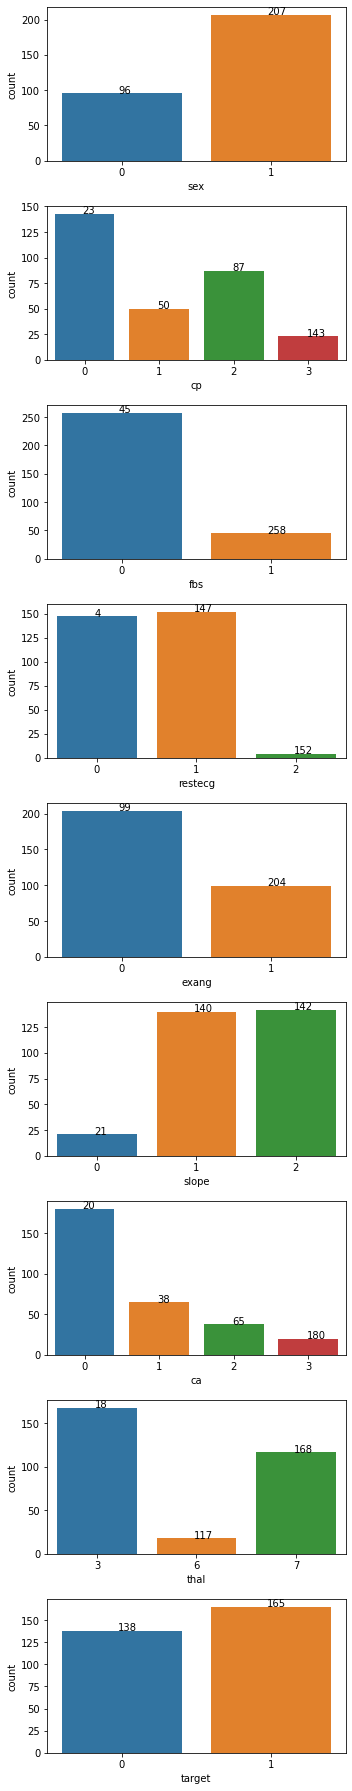

In [21]:
gen_countplots(df, all_cats)

In [22]:
def barplots(df, datas, cats):
    fig, axes = plt.subplots(nrows = len(datas), ncols = len(cats), figsize = (20,10))
    for i, data in enumerate(datas):
        for j, cat in enumerate(cats):
            sns.barplot(x = df[cat], y = df[data], ax = axes[i][j])
    plt.tight_layout()
    plt.show()

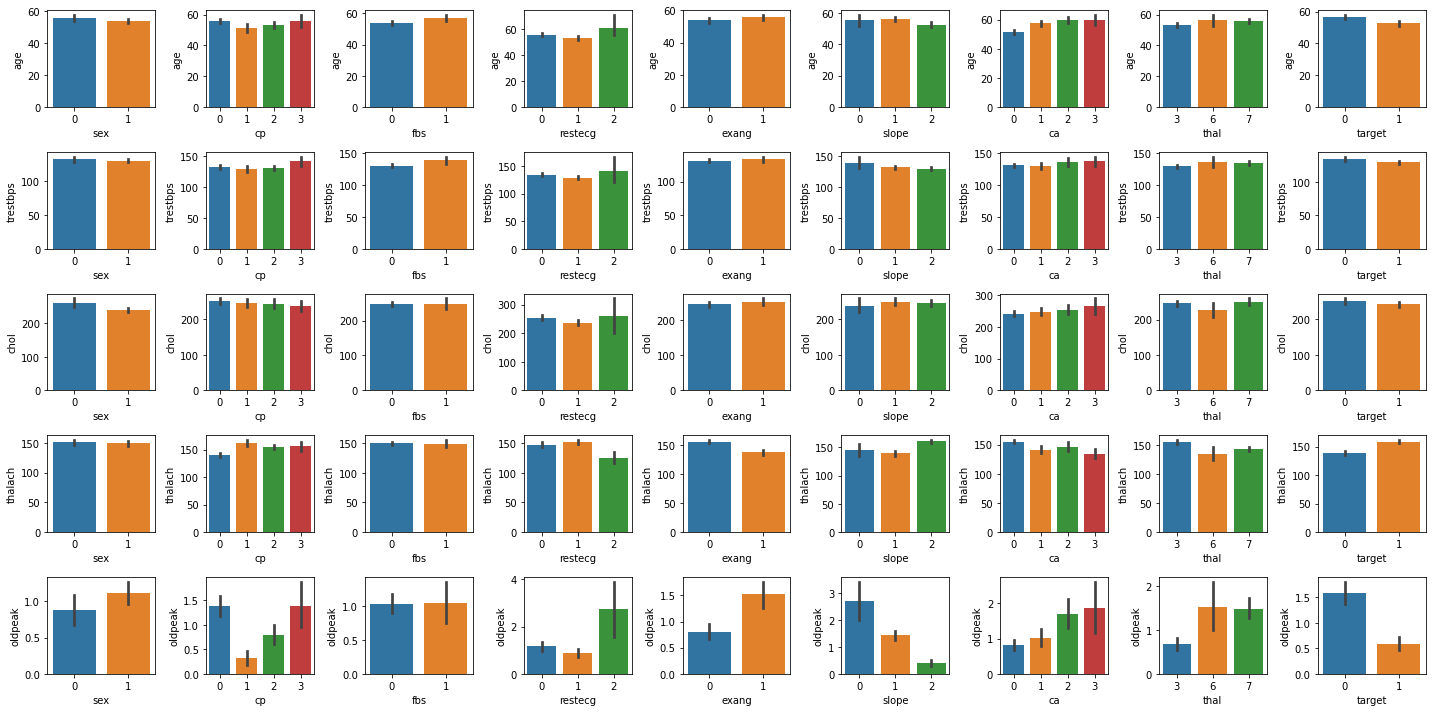

In [23]:
barplots(df, nums, all_cats)

In [24]:
def gen_boxplots(df, nums):
    fig, axes = plt.subplots(nrows = 1, ncols = len(nums), figsize = (15,5))
    for i, num in enumerate(nums):
        sns.boxplot(df[num],
                   ax = axes[i],
                   showmeans = True,
                   meanprops = {"markersize":"15",
                               "markerfacecolor":"orange",
                               "markeredgecolor":"red"})
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

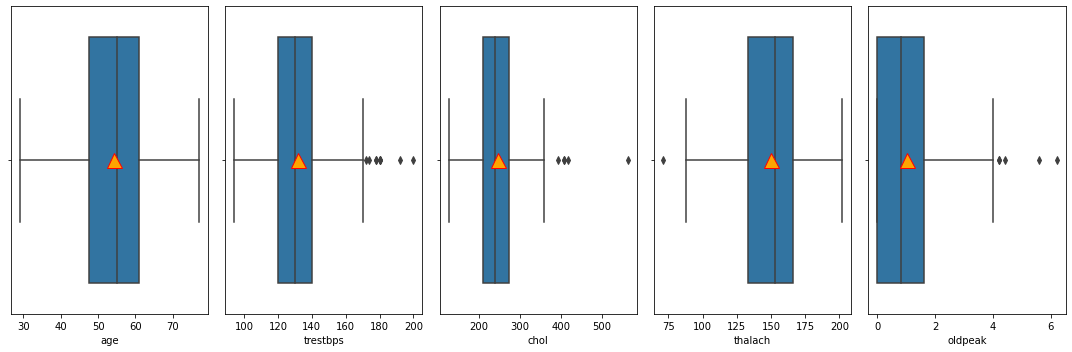

In [25]:
gen_boxplots(df, nums)

In [26]:
def outliers(df, num):
    perc = np.percentile(df[num], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    min_ = perc[1] - 1.5*iqr
    max_ = perc[3] + 1.5*iqr
    min_indexes = df.loc[df[num] < min_, num].index
    max_indexes = df.loc[df[num] > max_, num].index
    if len(min_indexes) != 0:
        df.loc[min_indexes, num] = min_
    if len(max_indexes) != 0:
        df.loc[max_indexes, num] = max_
    return df

In [27]:
def scats(df, xs, ys, target):
    fig, axes = plt.subplots(ncols = len(ys), nrows = 1, figsize = (13,4))
    for i, j in enumerate(ys):
        for z,c in enumerate(np.unique(df[target])):
            x = df[df[target] == c]
            axes[i].scatter(x[xs], x[j], label = c)
            axes[i].legend(loc = 'best').set_title(target)
            axes[i].set_xlabel(j)
            axes[i].set_ylabel(xs)
    plt.tight_layout()
    plt.show()

<ipython-input-28-7ac5e9d20d02>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(i, Fontsize = 16)


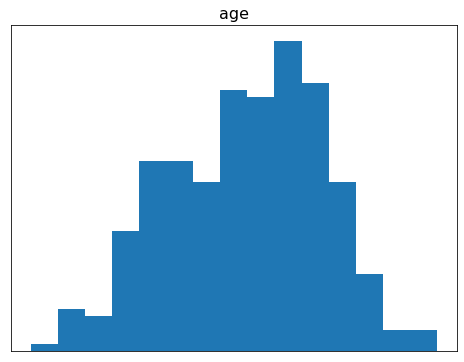

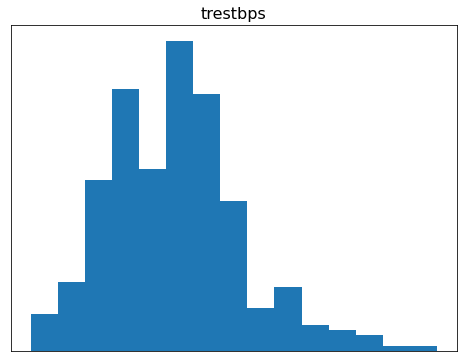

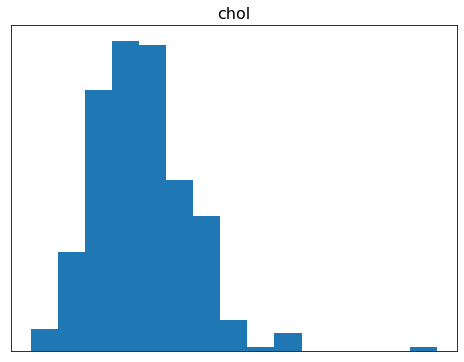

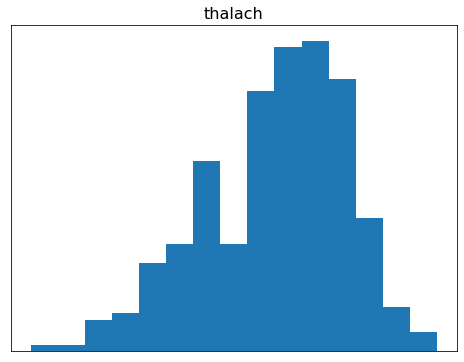

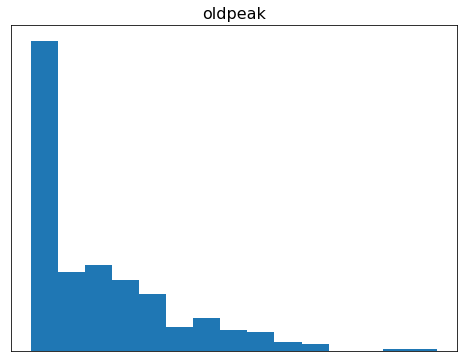

In [28]:
for i in nums:
    plt.figure(figsize = (8,6))
    df[i].hist(bins = 15)
    plt.title(i, Fontsize = 16)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [29]:
to_out = ['trestbps', 'chol', 'thalach', 'oldpeak']
for i in to_out:
    df = outliers(df, i)

<ipython-input-30-7ac5e9d20d02>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(i, Fontsize = 16)


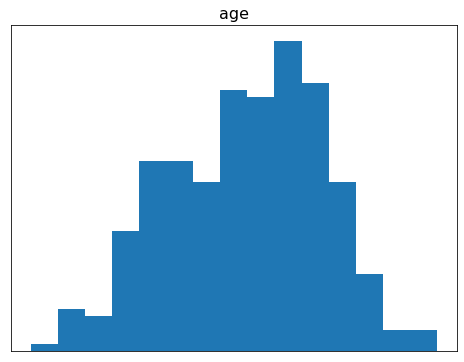

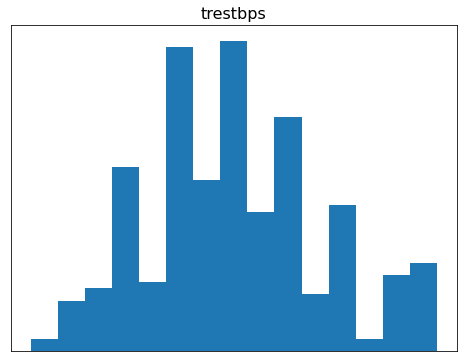

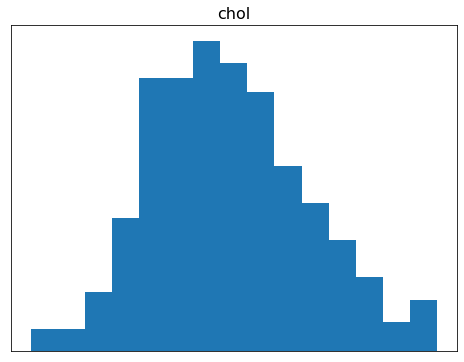

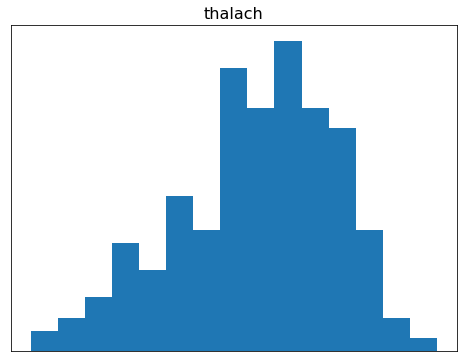

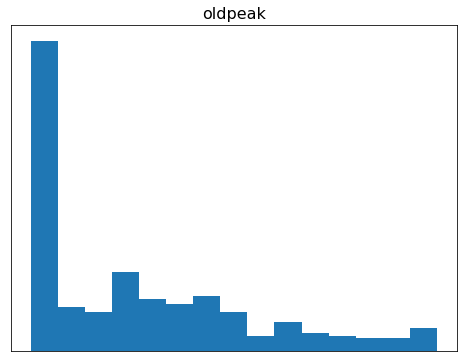

In [30]:
for i in nums:
    plt.figure(figsize = (8,6))
    df[i].hist(bins = 15)
    plt.title(i, Fontsize = 16)
    plt.xticks(())
    plt.yticks(())
plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

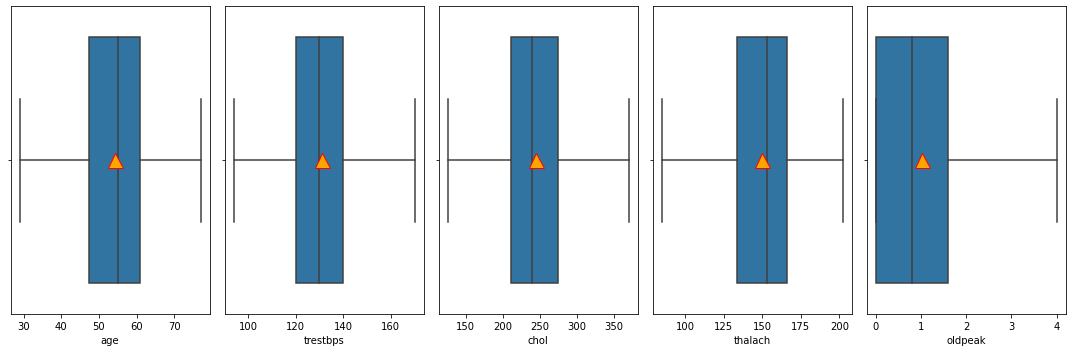

In [31]:
gen_boxplots(df, nums)

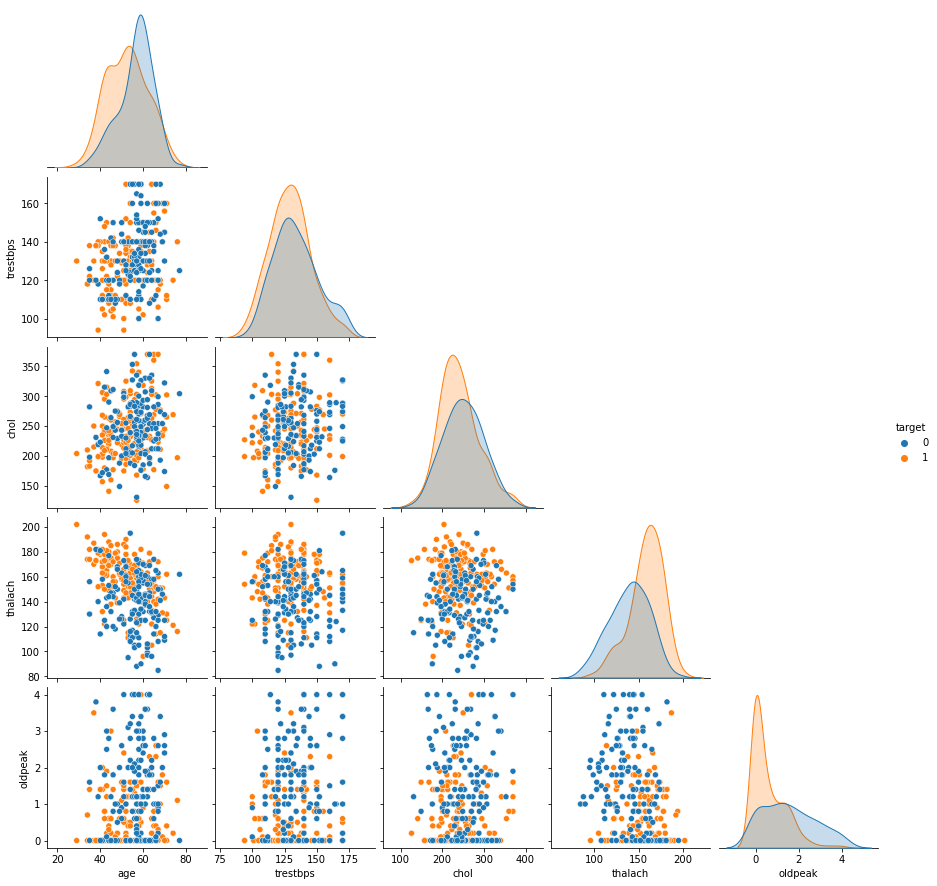

In [32]:
sns.pairplot(df, hue = 'target', vars = nums, corner = True)

In [33]:
all_cats

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User2-NB\anaconda3\lib\site-packages\s

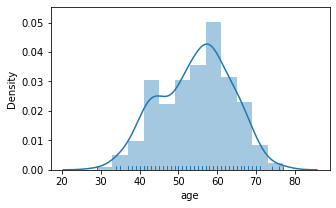

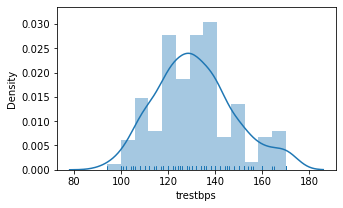

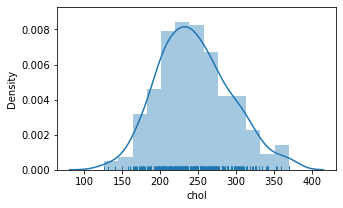

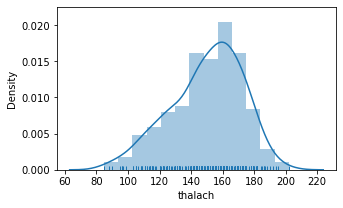

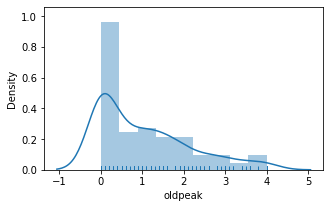

In [34]:
for i in nums:
    plt.figure(figsize=(5, 3))
    sns.distplot(df[i], rug=True)

In [35]:
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

In [36]:
models_fs = [knn, svc, dtc, rfc, gnb]

In [37]:
def select_feature_score(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_pred, y_test)

In [38]:
def num_modelling(x, y, model, nums, target, ml_name=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
#     model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    dfhat = pd.DataFrame(x_test, columns=nums)
    dfhat['target'] = y_pred
    g1 = sns.pairplot(dfhat, hue='target', vars=nums, corner=True)
    g1.fig.suptitle(f'Predicted values using {ml_name}\naccuracy:{round(accuracy_score(y_pred, y_test)*100,2)}%')
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

In [39]:
def cl_modelling(x, y, model, ml_name=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    y_pred = model.predict(x_test)
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
    plt.title(f'Predictions using {ml_name}\naccuracy:{round(accuracy_score(y_pred, y_test)*100,2)}%')

In [40]:
def score_extraction(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    y_pred = model.predict(x_test)
    return accuracy_score(y_pred, y_test)

In [41]:
df_ml = df.copy()
ss = StandardScaler()
ss.fit(df_ml[nums])
df_ml[nums] = ss.transform(df_ml[nums])

In [42]:
xn = df_ml[nums]
xcl = df_ml[cats]
x = df_ml.drop(['target'], axis=1)
y = df_ml['target']

<AxesSubplot:>

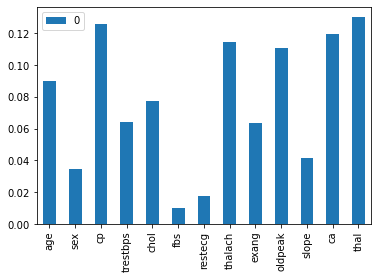

In [43]:
rfc1 = rfc
rfc1.fit(x, y)
importances = rfc1.feature_importances_
importances = pd.DataFrame(importances, index=x.columns)
importances.plot.bar()

In [44]:
xh = df_ml.drop(['fbs', 'restecg', 'sex', 'exang', 'slope', 'target'], axis=1)

In [45]:
features = range(2, len(nums)+1)
end_scores = dict()
for i in features:
    ml_sc = dict()
    scores = []
    fs = SelectKBest(score_func = f_classif, k = i)
    x_selected = fs.fit_transform(xn, y)
    for j in models_fs:
        scores.append(select_feature_score(x_selected, y, j))
        ml_sc[j] = select_feature_score(x_selected, y, j)
        print(ml_sc[j], end=' ')
    print("\n")
#     print(ml_sc)
    key = i
    end_scores[key] = np.mean(scores)

0.6813186813186813 0.7582417582417582 0.6263736263736264 0.6263736263736264 0.7362637362637363 

0.6593406593406593 0.7582417582417582 0.6593406593406593 0.7252747252747253 0.7802197802197802 

0.6703296703296703 0.7802197802197802 0.6483516483516484 0.6483516483516484 0.7802197802197802 

0.6813186813186813 0.7472527472527473 0.6153846153846154 0.6813186813186813 0.7802197802197802 



In [46]:
features_1 = range(2, len(cats) + 1)
end_scores_cl = dict()
for i in features_1:
    ml_sc = dict()
    scores = []
    fs = SelectKBest(score_func = chi2, k = i)
    fs.fit(xcl, y)
    x_selected = fs.transform(xcl)
    for j in models_fs:
        scores.append(select_feature_score(x_selected, y, j))
        ml_sc[j] = select_feature_score(x_selected, y, j)
        print(ml_sc[j], end=' ')
    print("\n")
#     print(ml_sc)
    key = i
    end_scores_cl[key] = np.mean(scores)

0.6813186813186813 0.7472527472527473 0.7142857142857143 0.7142857142857143 0.7692307692307693 

0.8241758241758241 0.8021978021978022 0.7912087912087912 0.8241758241758241 0.7912087912087912 

0.8241758241758241 0.8131868131868132 0.7802197802197802 0.7912087912087912 0.8021978021978022 

0.8131868131868132 0.8021978021978022 0.7802197802197802 0.8241758241758241 0.8021978021978022 

0.8351648351648352 0.8131868131868132 0.7802197802197802 0.8351648351648352 0.8131868131868132 

0.8241758241758241 0.8131868131868132 0.7912087912087912 0.8571428571428571 0.8131868131868132 

0.8351648351648352 0.8131868131868132 0.7802197802197802 0.8571428571428571 0.8021978021978022 



In [47]:
print("Max features for numerical input:")
best_one = max(end_scores.items(), key=operator.itemgetter(1))[0]
print(f"{best_one} with a mean score of:{end_scores[best_one]}")

Max features for numerical input:
3 with a mean score of:0.7098901098901098


In [48]:
print("Max features for categorical input:")
best_one_cl = max(end_scores_cl.items(), key=operator.itemgetter(1))[0]
print(f"{best_one_cl} with a mean score of:{end_scores_cl[best_one_cl]}")

Max features for categorical input:
6 with a mean score of:0.8153846153846154


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [50]:
c = [0.84355617513995,
 0.8025592561542737,
 0.8267696437079625,
 0.02773339640865191,
 0.03313549928974535,
 0.44702107825924053,
 0.7846917103527767,
 0.8099442515822047,
 0.0675923782238449,
 0.22791068404566872,
 0.6133306789207404,
 0.10160593266321405,
 0.13395329839869696,
 0.06723072002318431,
 0.010940309432432405]

In [51]:
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [52]:
knn_params = {
    'n_neighbors': range(1,31),
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}
svc_params = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': c
}
dtc_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [x for x in range(10)]
}
rfc_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [x for x in range(10)]
}

In [53]:
grid_knn = GridSearchCV(knn,
                       param_grid=knn_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_svc = GridSearchCV(svc,
                       param_grid=svc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_dtc = GridSearchCV(dtc,
                       param_grid=dtc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_rfc = GridSearchCV(rfc,
                       param_grid=rfc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)

In [54]:
mls = [knn, svc, dtc, rfc, gnb]

In [55]:
all_knn = GridSearchCV(knn, param_grid=knn_params)
all_svc = GridSearchCV(svc, param_grid=svc_params)
all_dtc = GridSearchCV(dtc, param_grid=dtc_params)
all_rfc = GridSearchCV(rfc, param_grid=rfc_params)
all_gnb = GaussianNB()
num_knn = GridSearchCV(knn, param_grid=knn_params)
num_svc = GridSearchCV(svc, param_grid=svc_params)
num_dtc = GridSearchCV(dtc, param_grid=dtc_params)
num_rfc = GridSearchCV(rfc, param_grid=rfc_params)
num_gnb = GaussianNB()
cl_knn = GridSearchCV(knn, param_grid=knn_params)
cl_svc = GridSearchCV(svc, param_grid=svc_params)
cl_dtc = GridSearchCV(dtc, param_grid=dtc_params)
cl_rfc = GridSearchCV(rfc, param_grid=rfc_params)
cl_gnb = GaussianNB()
hb_knn = GridSearchCV(knn, param_grid=knn_params)
hb_svc = GridSearchCV(svc, param_grid=svc_params)
hb_dtc = GridSearchCV(dtc, param_grid=dtc_params)
hb_rfc = GridSearchCV(rfc, param_grid=rfc_params)
hb_gnb = GaussianNB()
dum_knn = GridSearchCV(knn, param_grid=knn_params)
dum_svc = GridSearchCV(svc, param_grid=svc_params)
dum_dtc = GridSearchCV(dtc, param_grid=dtc_params)
dum_rfc = GridSearchCV(rfc, param_grid=rfc_params)
dum_gnb = GaussianNB()

In [56]:
grids_all = [all_knn, all_svc, all_dtc, all_rfc, all_gnb]
for grid in grids_all:
    start = time.time()
    grid.fit(x_train, y_train)
    end = time.time()
    print(f"Time needed to find and train model: {end - start} seconds")

Time needed to find and train model: 8.799938917160034 seconds
Time needed to find and train model: 4.882008075714111 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time needed to find and train model: 1.0646493434906006 seconds
Time needed to find and train model: 43.78160810470581 seconds
Time needed to find and train model: 0.003103494644165039 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

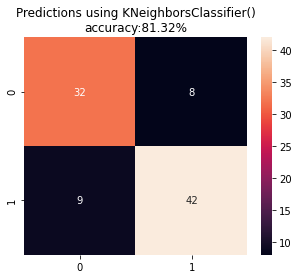

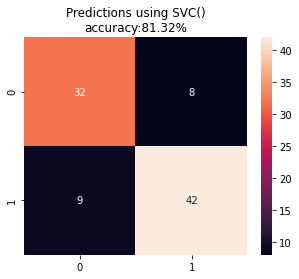

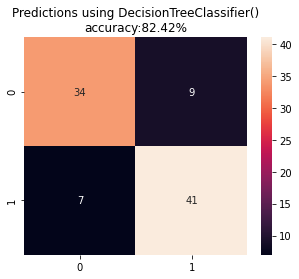

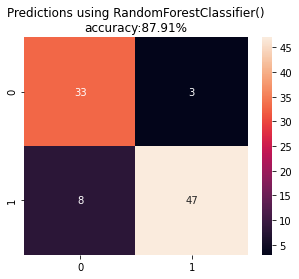

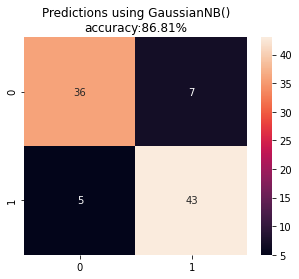

In [117]:
for grid, ml in zip(grids_all, mls):
    cl_modelling(x, y, grid, ml)

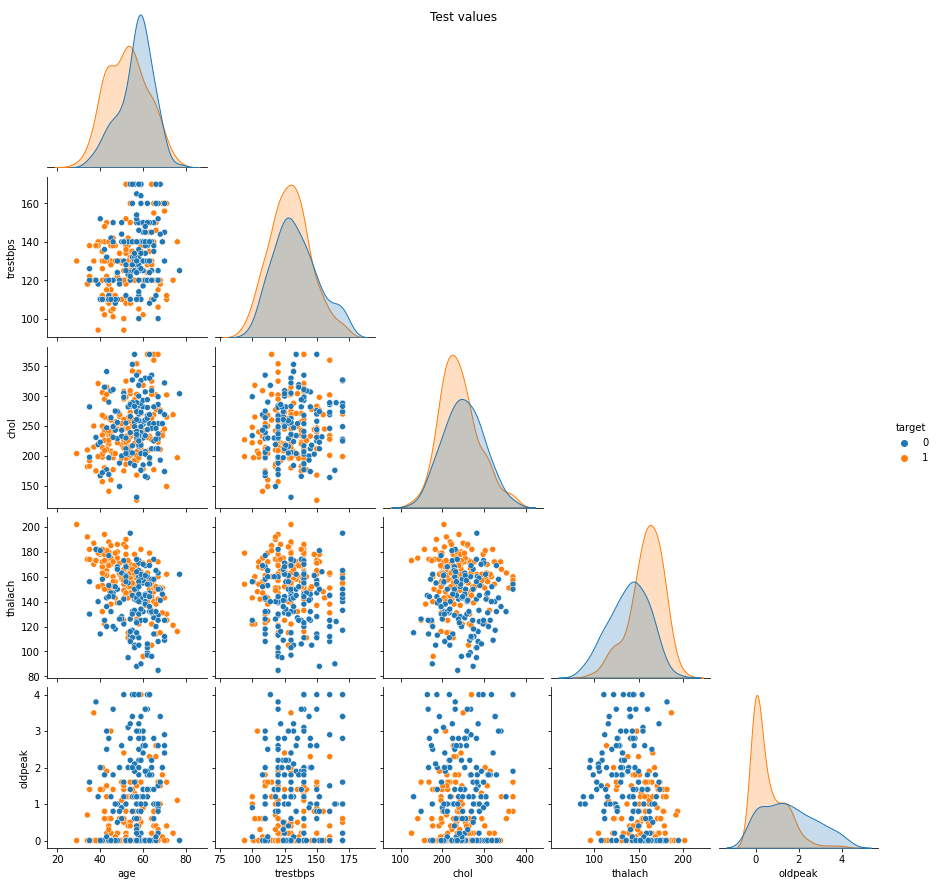

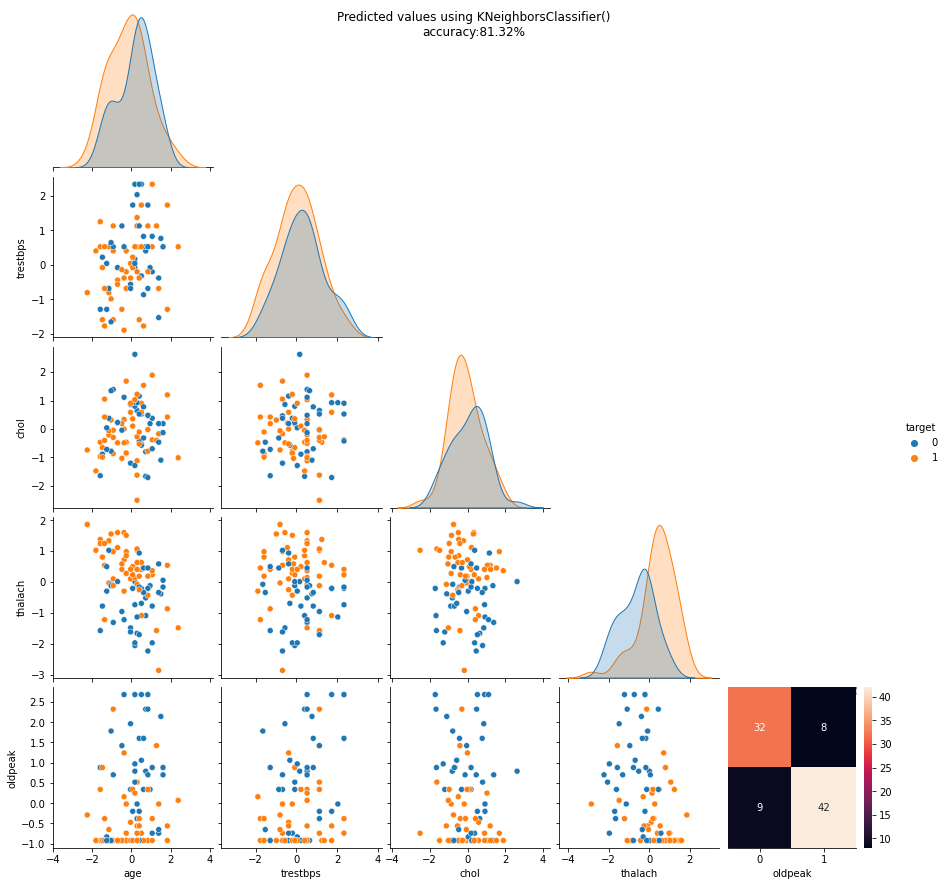

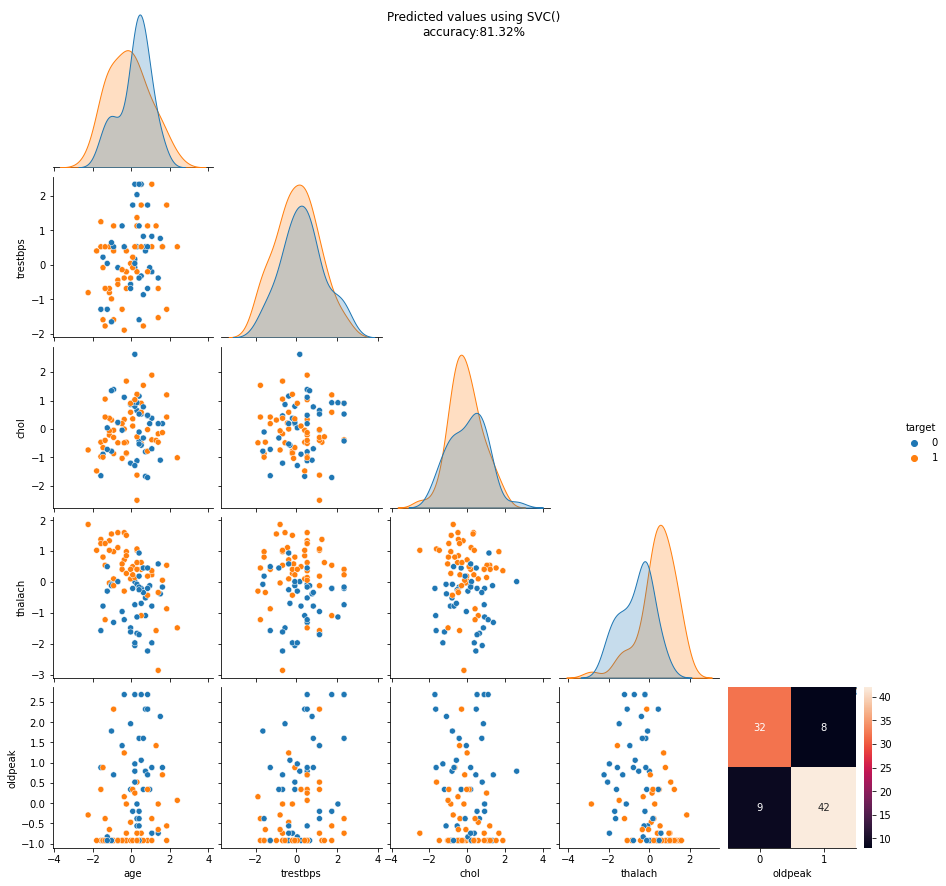

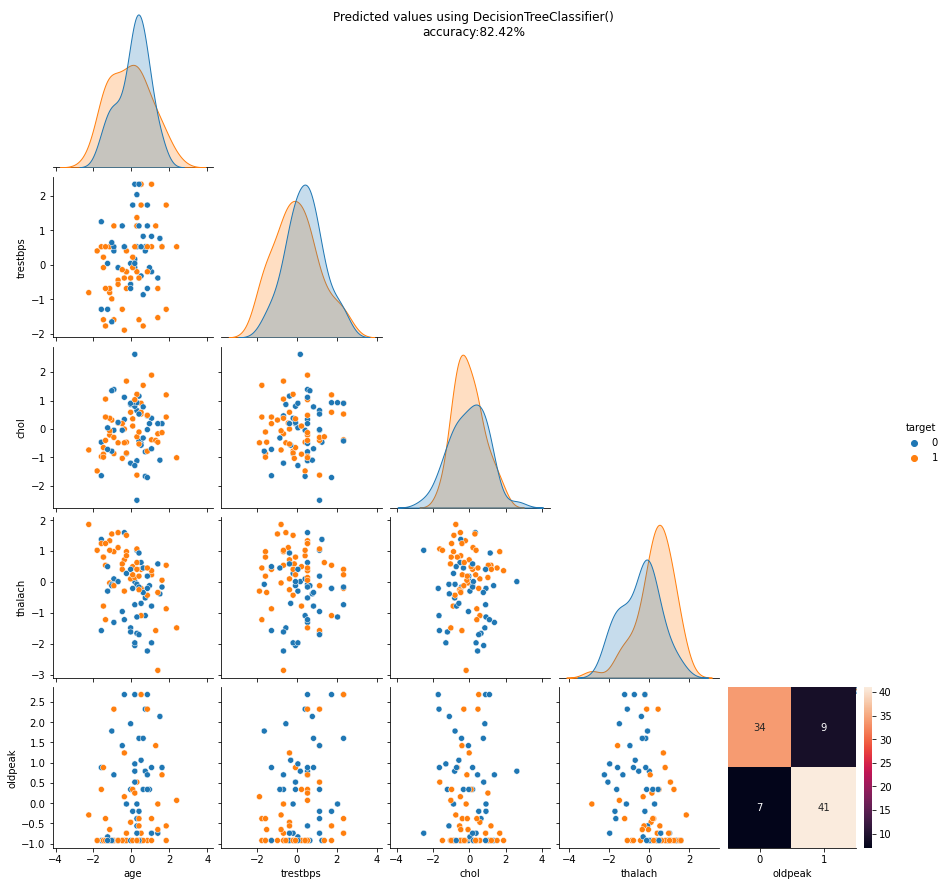

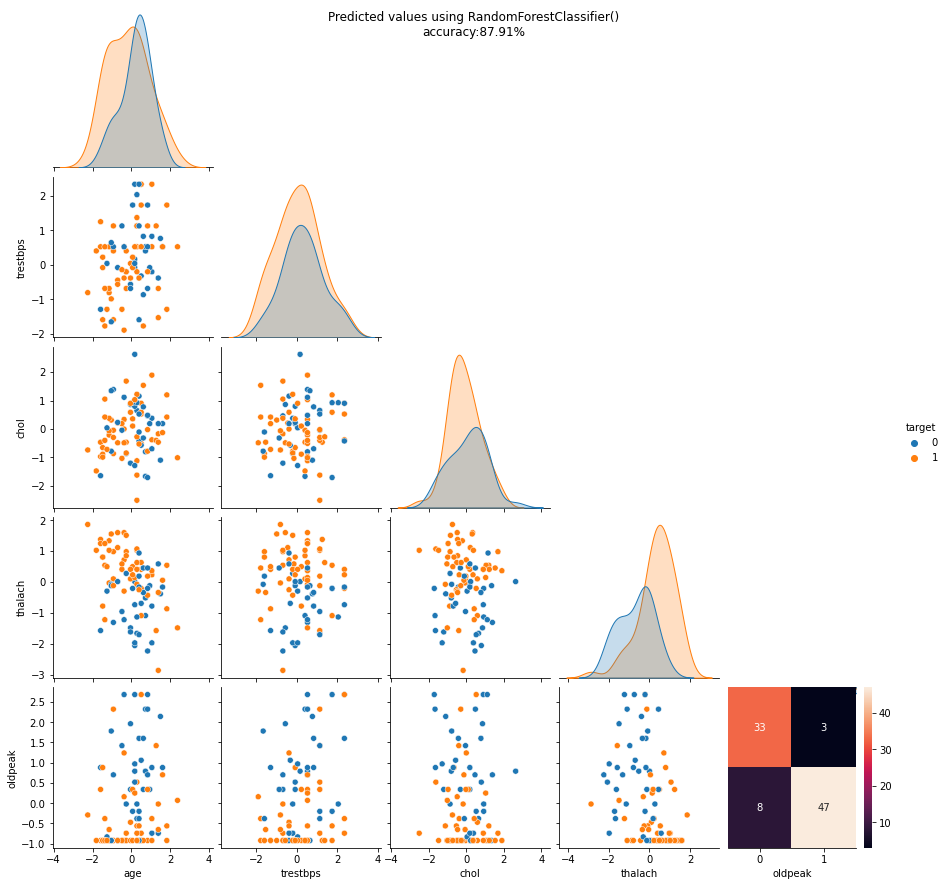

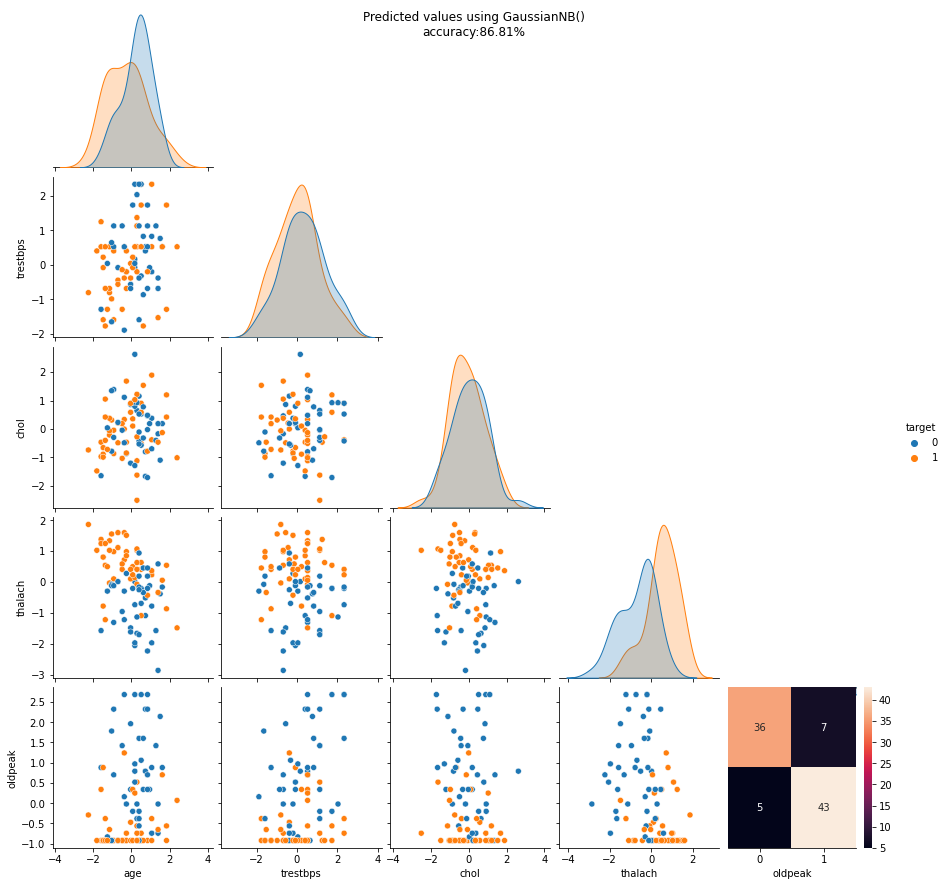

In [57]:
g = sns.pairplot(df, hue='target', vars=nums, corner=True)
g.fig.suptitle('Test values')
for grid, ml in zip(grids_all, mls):
    num_modelling(x, y, grid, nums, 'target', ml)

In [58]:
for grid in grids_all[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
{'C': 0.22791068404566872, 'gamma': 'scale', 'kernel': 'linear'}
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto'}


In [59]:
all_scores = dict()
for grid, ml in zip(grids_all, mls):
    score = score_extraction(x, y, grid)
    all_scores[ml] = score
sorted(all_scores.items(), key=operator.itemgetter(1))

[(KNeighborsClassifier(), 0.8131868131868132),
 (SVC(), 0.8131868131868132),
 (DecisionTreeClassifier(), 0.8241758241758241),
 (GaussianNB(), 0.8681318681318682),
 (RandomForestClassifier(), 0.8791208791208791)]

In [60]:
cl_fs = SelectKBest(score_func=chi2, k=best_one_cl)
cl_fs.fit(xcl, y)
x_cl = cl_fs.transform(xcl)

In [61]:
xcl_train, xcl_test, ycl_train, ycl_test = train_test_split(x_cl, y, random_state=42, test_size=0.3)

In [62]:
grids_cl = [cl_knn, cl_svc, cl_dtc, cl_rfc, cl_gnb]
for grid in grids_cl:
    start = time.time()
    grid.fit(xcl_train, ycl_train)
    end = time.time()
    print(f"Time needed to find and train model: {end - start} seconds")

Time needed to find and train model: 3.906588077545166 seconds
Time needed to find and train model: 2.6612043380737305 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time needed to find and train model: 0.3216402530670166 seconds
Time needed to find and train model: 41.30365204811096 seconds
Time needed to find and train model: 0.0 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [63]:
for grid in grids_cl[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
{'C': 0.13395329839869696, 'gamma': 'scale', 'kernel': 'linear'}
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'}


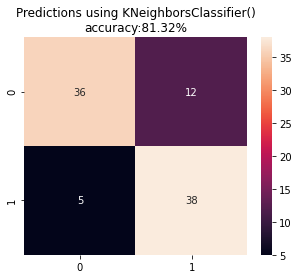

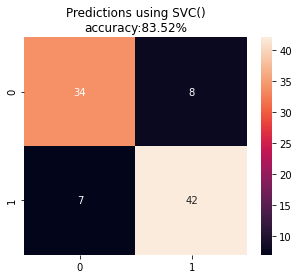

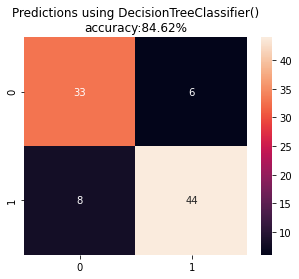

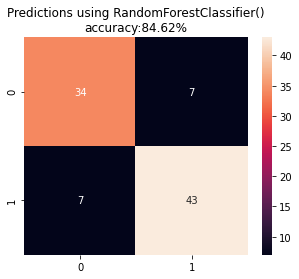

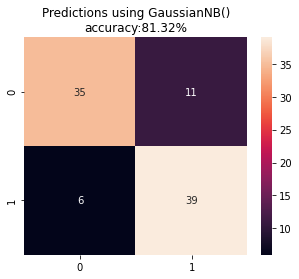

In [64]:
for grid, ml in zip(grids_cl, mls):
    cl_modelling(x_cl, y, grid, ml)

In [65]:
cl_scores = dict()
for grid, ml in zip(grids_cl, mls):
    score = score_extraction(x_cl, y, grid)
    cl_scores[ml] = score
sorted(cl_scores.items(), key=operator.itemgetter(1))

[(KNeighborsClassifier(), 0.8131868131868132),
 (GaussianNB(), 0.8131868131868132),
 (SVC(), 0.8351648351648352),
 (DecisionTreeClassifier(), 0.8461538461538461),
 (RandomForestClassifier(), 0.8461538461538461)]

In [66]:
n_fs = SelectKBest(score_func=f_classif, k=best_one)
n_fs.fit(xn, y)
x_n = n_fs.transform(xn)

In [67]:
xn_train, xn_test, yn_train, yn_test = train_test_split(x_n, y, random_state=42, test_size=0.3)

In [68]:
grids_num = [num_knn, num_svc, num_dtc, num_rfc, num_gnb]
for grid in grids_num:
    start = time.time()
    grid.fit(xn_train, yn_train)
    end = time.time()
    print(f"Time needed to find and train model: {end - start} seconds")

Time needed to find and train model: 3.8127527236938477 seconds
Time needed to find and train model: 2.3924686908721924 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time needed to find and train model: 0.34704113006591797 seconds
Time needed to find and train model: 41.89601945877075 seconds
Time needed to find and train model: 0.0009815692901611328 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [69]:
for grid in grids_num[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'distance'}
{'C': 0.13395329839869696, 'gamma': 'scale', 'kernel': 'linear'}
{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}


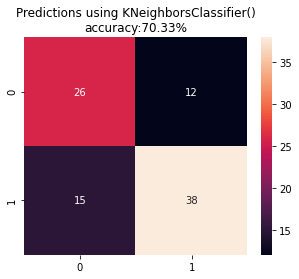

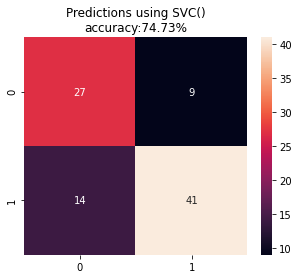

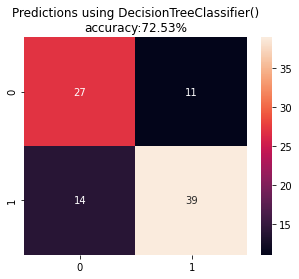

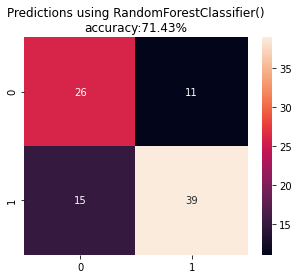

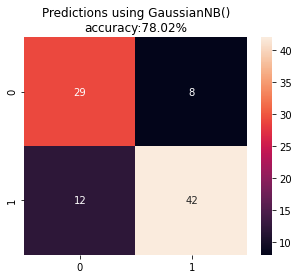

In [70]:
for grid, ml in zip(grids_num, mls):
    cl_modelling(x_n, y, grid, ml)

In [71]:
num_scores = dict()
for grid, ml in zip(grids_num, mls):
    score = score_extraction(x_n, y, grid)
    num_scores[ml] = score
sorted(num_scores.items(), key=operator.itemgetter(1))

[(KNeighborsClassifier(), 0.7032967032967034),
 (RandomForestClassifier(), 0.7142857142857143),
 (DecisionTreeClassifier(), 0.7252747252747253),
 (SVC(), 0.7472527472527473),
 (GaussianNB(), 0.7802197802197802)]

In [72]:
xh_train, xh_test, yh_train, yh_test = train_test_split(xh, y, random_state=42, test_size=0.3)

In [73]:
grids_hb = [hb_knn, hb_svc, hb_dtc, hb_rfc, hb_gnb]
for grid in grids_hb:
    start = time.time()
    grid.fit(xh_train, yh_train)
    end = time.time()
    print(f"Time needed to find and train model: {end - start} seconds")

Time needed to find and train model: 8.897551774978638 seconds
Time needed to find and train model: 4.464819431304932 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time needed to find and train model: 1.0253393650054932 seconds
Time needed to find and train model: 44.82160305976868 seconds
Time needed to find and train model: 0.0021648406982421875 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [74]:
for grid in grids_hb[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'}
{'C': 0.84355617513995, 'gamma': 'scale', 'kernel': 'linear'}
{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}


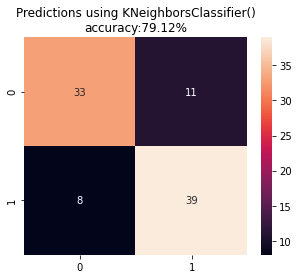

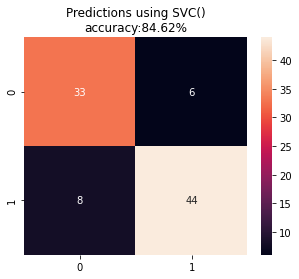

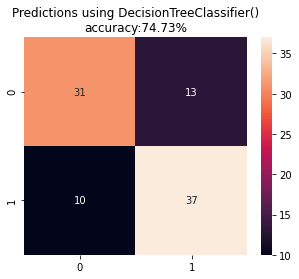

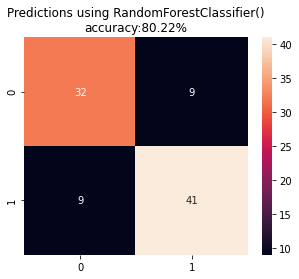

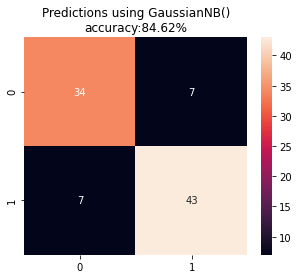

In [75]:
for grid, ml in zip(grids_hb, mls):
    cl_modelling(xh, y, grid, ml)

In [76]:
hb_scores = dict()
for grid, ml in zip(grids_hb, mls):
    score = score_extraction(xh, y, grid)
    hb_scores[ml] = score
sorted(hb_scores.items(), key=operator.itemgetter(1))[-3:]

[(RandomForestClassifier(), 0.8021978021978022),
 (SVC(), 0.8461538461538461),
 (GaussianNB(), 0.8461538461538461)]

In [77]:
dum_df = pd.get_dummies(df, columns = cats)

In [78]:
num_ss = StandardScaler()
num_ss.fit(dum_df[nums])
dum_df[nums] = num_ss.transform(dum_df[nums])

In [79]:
dum_df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,0.952197,0.828728,-0.255601,0.013543,1.150938,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,-1.915313,-0.077351,0.102487,1.641748,2.233684,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,-1.474158,-0.077351,-0.866457,0.981665,0.338879,1,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,0.180175,-0.681403,-0.192409,1.245698,-0.202494,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,0
4,0.290464,-0.681403,2.293143,0.585615,-0.382951,1,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.526702,-0.087089,-1.174607,-0.743867,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
299,-1.033002,-1.285455,0.397383,-0.778557,0.158422,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
300,1.503641,0.768323,-1.098161,-0.382507,2.143455,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
301,0.290464,-0.077351,-2.404128,-1.526651,0.158422,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


In [80]:
x_dum = dum_df.drop(['target'], axis = 1).values
y_dum = dum_df['target'].values

In [81]:
xdum_train, xdum_test, ydum_train, ydrum_test = train_test_split(x_dum, y_dum, random_state=42, test_size=0.3)

In [82]:
grids_dum = [dum_knn, dum_svc, dum_dtc, dum_rfc, dum_gnb]
for grid in grids_dum:
    start = time.time()
    grid.fit(xdum_train, ydum_train)
    end = time.time()
    print(f"Time needed to find and train model: {end - start} seconds")

Time needed to find and train model: 3.804161787033081 seconds
Time needed to find and train model: 2.4771976470947266 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time needed to find and train model: 0.3137216567993164 seconds
Time needed to find and train model: 42.684730052948 seconds
Time needed to find and train model: 0.001524209976196289 seconds


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [83]:
for grid in grids_dum[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
{'C': 0.44702107825924053, 'gamma': 'auto', 'kernel': 'sigmoid'}
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}


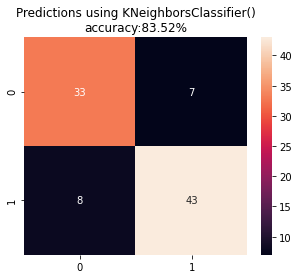

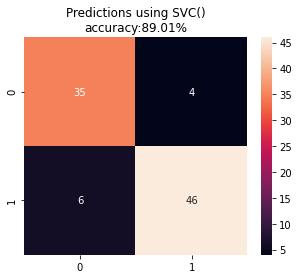

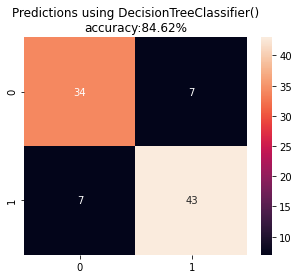

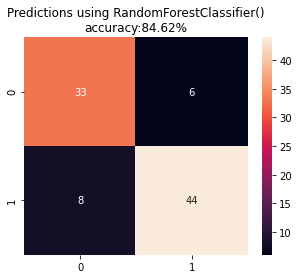

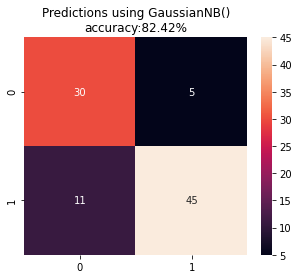

In [84]:
for grid, ml in zip(grids_dum, mls):
    cl_modelling(x_dum, y_dum, grid, ml)

In [85]:
dum_scores = dict()
for grid, ml in zip(grids_dum, mls):
    score = score_extraction(x_dum, y_dum, grid)
    dum_scores[ml] = score

In [86]:
dum_best = sorted(dum_scores.items(), key=operator.itemgetter(1))[-3:]

In [87]:
all_best = sorted(all_scores.items(), key=operator.itemgetter(1))[-3:]

In [88]:
cl_best = sorted(cl_scores.items(), key=operator.itemgetter(1))[-3:]

In [89]:
cl_best

[(SVC(), 0.8351648351648352),
 (DecisionTreeClassifier(), 0.8461538461538461),
 (RandomForestClassifier(), 0.8461538461538461)]

In [90]:
num_best = sorted(num_scores.items(), key=operator.itemgetter(1))[-3:]

In [91]:
hb_best = sorted(hb_scores.items(), key=operator.itemgetter(1))[-3:]

In [92]:
mean_scores = dict()
inputs = ['all_features', 'numerical', 'class', 'hybrid', 'dummies']
score_dicts = [all_best, num_best, cl_best, hb_best, dum_best]
for dct, inp in zip(score_dicts, inputs):
    sc = []
    for i in dct:
        sc.append(i[1])
    mean_scores[inp] = np.mean(sc)

In [93]:
sorted(mean_scores.items(), key=operator.itemgetter(1))

[('numerical', 0.7509157509157509),
 ('hybrid', 0.8315018315018315),
 ('class', 0.8424908424908425),
 ('all_features', 0.8571428571428571),
 ('dummies', 0.8608058608058607)]

In [103]:
dum_best

[(DecisionTreeClassifier(), 0.8461538461538461),
 (RandomForestClassifier(), 0.8461538461538461),
 (SVC(), 0.8901098901098901)]

In [101]:
all_best

[(DecisionTreeClassifier(), 0.8241758241758241),
 (GaussianNB(), 0.8681318681318682),
 (RandomForestClassifier(), 0.8791208791208791)]

In [95]:
def model_visualise(x, y, grid, ml, x_axis, y_axis, params):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    y_pred = grid.predict(x_test)
    sc = accuracy_score(y_pred, y_test)*100
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    for i, j in enumerate(np.unique(y_pred)):
        axes[0].scatter(x_test[y_pred==j, x_axis], x_test[y_pred==j, y_axis])
    for i, j in enumerate(np.unique(y_test)):
        axes[1].scatter(x_test[y_test==j, x_axis], x_test[y_test==j, y_axis])
    if params == 'yes':
        axes[0].set_title(f"Predicted using {ml} with\n{grid.best_params_}\nscore:{round(sc, 2)}%")
    if params == 'no':
        axes[0].set_title(f"Predicted using {grid} with\nscore:{round(sc, 2)}%")
    axes[1].set_title(f"Observed values")
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


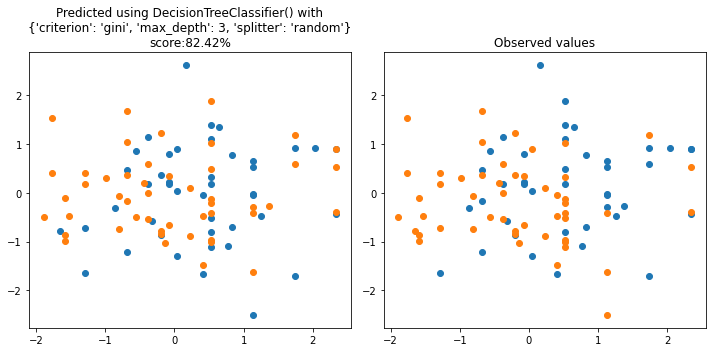

C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


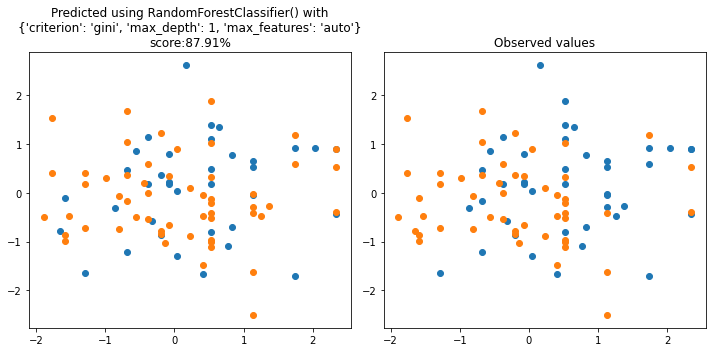

C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


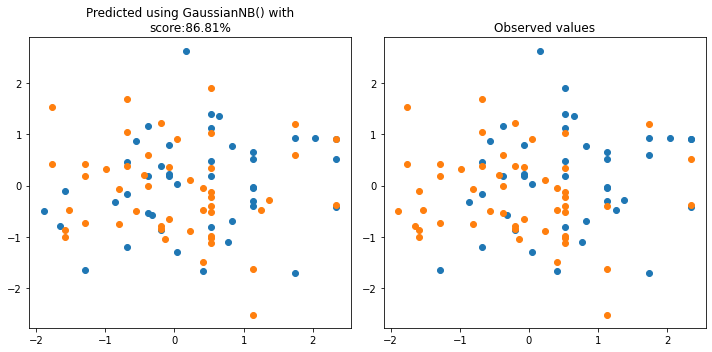

In [115]:
for grid, ml in zip(grids_all[2:4], mls[2:4]):
    model_visualise(x.values, y, grid, ml, 3, 4, 'yes')
model_visualise(x.values, y, grids_all[-1], mls[-1], 3, 4, 'no')

In [116]:
for grid, ml in zip(grids_all[2:4], mls[2:4]):
    print(f"{ml} params: {grid.best_params_}")
print(mls[-1], " without params")

DecisionTreeClassifier() params: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
RandomForestClassifier() params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto'}
GaussianNB()  without params


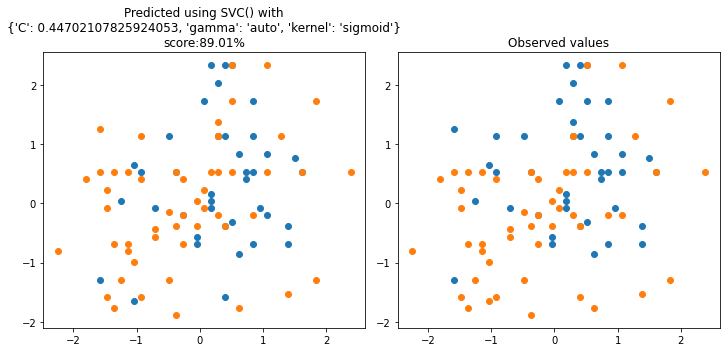

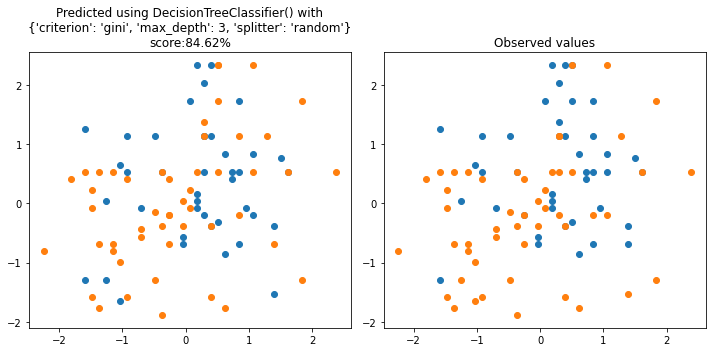

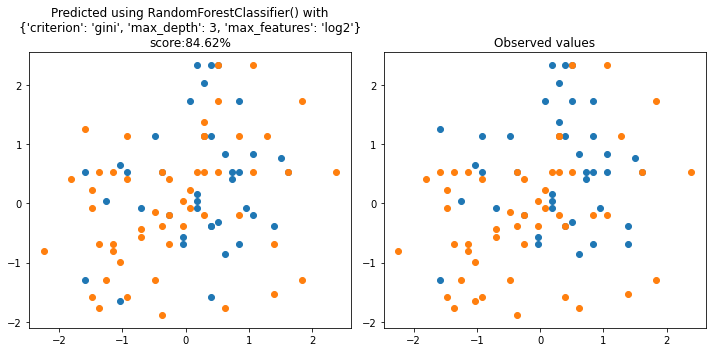

In [105]:
for grid, ml in zip(grids_dum[1:4], mls[1:4]):
    model_visualise(x_dum, y_dum, grid, ml, 0, 1, 'yes')

In [100]:
for grid, ml in zip(grids_dum[:3], mls[:3]):
    print(f"{ml} params: {grid.best_params_}")

KNeighborsClassifier() params: {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
SVC() params: {'C': 0.44702107825924053, 'gamma': 'auto', 'kernel': 'sigmoid'}
DecisionTreeClassifier() params: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
